<a href="https://colab.research.google.com/github/anamaria1-4/GitHub-Finanzas_-Computacionales/blob/main/Proyecto_Final_Daniel_Jorge%2C_Ana_Mar%C3%ADa_Rojas_y_Sarah_T%C3%A9llez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.uexternado.edu.co/wp-content/uploads/2020/07/logo-uec.png" width="180" height="80"> 

<center>

<br><br>

<b>Proyecto Final</b>
<div style="font-size:175%;color:write; background-color: #0064b0;">Pregrado en Finanzas y Relaciones Internacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Finanzas Computacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Carlos Andrés Zapata Quimbayo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estudiantes: Daniel Steven Jorge Cardona, Ana María Rojas Giraldo y Sarah Stephania Téllez Barbosa</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">2022</div> 
</center>

#### Se importan las librerias necesarias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import time
warnings.filterwarnings('ignore')
!pip install --quiet fitter
from fitter import Fitter, get_common_distributions, get_distributions
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

## PRONÓSTICO PRECIOS DEL DÓLAR 

###Pronóstico de la Tasa Representativa del Mercado para el 4 de Noviembre de 2022

#### Se importa la base de datos históricos de la Tasa Representativa del Mercado hasta el mes de Octubre del 2022

In [3]:
TRM_Oct=pd.read_excel("TRM-Octubre.xlsx",parse_dates=True, 
                 index_col="Fecha (dd/mm/aaaa)")
TRM_Oct

,TRM (COP/USD)
Fecha (dd/mm/aaaa),
2017-11-04,3055.57
2017-11-05,3055.57
2017-11-06,3055.57
2017-11-07,3055.57
2017-11-08,3026.94
...,...
2022-09-30,4532.07
2022-10-01,4590.54
2022-10-02,4590.54


#### Descripción de los datos 

In [7]:
TRM_Oct.describe()

,TRM (COP/USD)
count,1796.000000
mean,3506.654961
std,423.493506
min,2705.340000
25%,3160.480000
50%,3515.650000
75%,3826.860000
max,4627.460000


Se tienen en total 1.796 datos históricos tomados desde el 2017 hasta octubre del año 2022. El precio promedio de la TRM en los últimos 5 años ha sido de 3.507 pesos, aproximadamente. Por otro lado, se observa que el precio de la TRM tiene una desviación estandar de 423,49 pesos, es decir, este valor indica qe tan dispersos estan los precios alrededor de la media. Por último, con respecto al precio mínimo que ha tenido la TRM en los últimos años y el mayor precio alcanzado, se determina que ha tenido una variación de 71,04% aproximadamente en los años analizados. 

##### Kurtosis y Asimestría

In [8]:
datos= TRM_Oct['TRM (COP/USD)']
from scipy.stats import kurtosis, skew
kurtosis(datos), skew(datos)

(-0.7483804623942576, 0.11058424413932479)

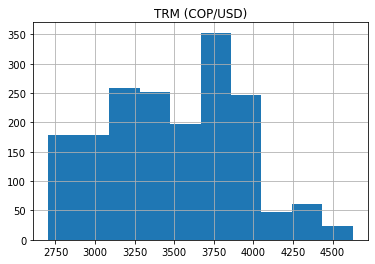

In [11]:
TRM_Oct.hist();

* Curtosis: Para la distribución normal estándar se menciona que la curtosis es exactamente igual a 0. No obstante, se puede observar que, la distribución de frecuencia de la TRM, no pertenence a una distribución normal ya que su curtosis no es 0. Las distribución de frecuencia se encuentra clasificada dentro de platicúrtica, es decir, los precios de la TRM están menos concentradas alrededor de la media y conforman una distribución mucho más aplanada que la normal.

* Asimetría: Al presentar una asimestría positiva de 0.11 se puede determinar que los datos tienen una distribución sesgada hacia el lado postivo de la gráfica. Es decir, se presenta una forma más escorada hacia la izquierda. 

#### Se realiza el calculo de los retornos logarítmicos de la serie histórica de los datos.

In [12]:
retornos_oct=np.log(TRM_Oct/TRM_Oct.shift()).dropna()
retornos_oct 

,TRM (COP/USD)
Fecha (dd/mm/aaaa),
2017-11-05,0.000000
2017-11-06,0.000000
2017-11-07,0.000000
2017-11-08,-0.009414
2017-11-09,-0.003031
...,...
2022-09-30,0.010008
2022-10-01,0.012819
2022-10-02,0.000000


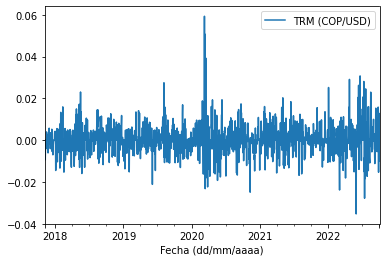

In [13]:
retornos_oct.plot();

####Función de Autocorrelación total *ACF*

* Se importan las librerias necesarias.

In [14]:
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf

* Gráficas de autocorrelación ACF

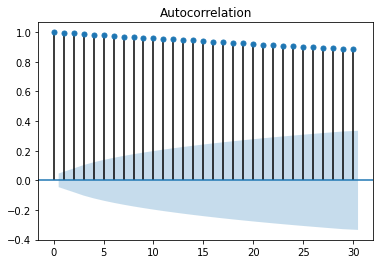

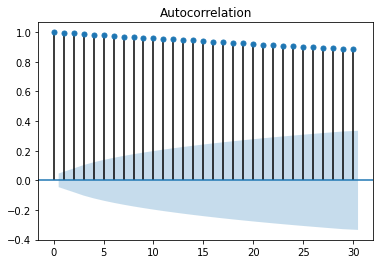

In [15]:
plot_acf(TRM_Oct, lags=30)

***Análisis:***

Se puede observar que la existencia de una correlación en los precios de la TRM, por tanto, los valores pasados influyen en los actuales. Por otra parte, se puede observar una tendencia sostenida que resulta cercana a 1, por ende, en un principio se puede concluir que la serie no es estacionaria. 


####Test Dickey Fuller

* Se importan las librerias necesarias.

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

* Se realiza el test de Dickey Fuller

In [17]:
prueba_df = adfuller(TRM_Oct)
print("ADF test: %f" % prueba_df[0])
print("P-value: %f" % prueba_df[1])
print("Citical values:")
for key, value in prueba_df[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -0.521552
P-value: 0.887742
Citical values:
	1%: -3.434021
	5%: -2.863161
	10%: -2.567633


***Análisis:***

La hipótesis nula del Test Dickery Fuller permite determinar que los datos son no estacionarios. Por lo tanto, de acuerdo a los resultados obtenidos se puede comprobar que en efecto la serie es no estacionaria. Se asume lo anterior debido a lo siguiente: 
* En primer lugar, el valor-p resulta mayor que un nivel de significancia usual del 5%, por tanto, no se rechaza la hipótesis nula. 
* En segundo lugar, se puede observar que el estadístico del Test es de -0.521552 valor que resulta mayor a los valores críticos al 1%, 5% y 10% en términos absolutos.




#### Primera diferencia de la de tiempo

In [18]:
TRM_diff_oct=TRM_Oct.diff().dropna()
TRM_diff_oct
prueba_df = adfuller(TRM_diff_oct)
print("ADF test: %f" % prueba_df[0])
print("P-value: %f" % prueba_df[1])
print("Citical values:")
for key, value in prueba_df[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -12.506732
P-value: 0.000000
Citical values:
	1%: -3.434021
	5%: -2.863161
	10%: -2.567633


***Análisis:***

Se puede concluir que la serie se vuelve estacionaria en la primera diferencia, es decir, el orden de integración de la serie es 1. En efecto, se cuenta con un valor-p inferior a un nivel de significancia usual del 5%, por lo tanto, se rechaza la hipótesis nula. Además, el estadístico del Test resulta inferior a los valores críticos del 1%, 5% y 10%, por consiguiente, se concluye que la serie es estacionaria.


####Modelo ARIMA

In [19]:
res_Diff_oct = sm.tsa.arma_order_select_ic(retornos_oct, ic='aic', trend="nc") 
res_Diff_oct

{'aic':               0             1             2
 0           NaN -12986.289831 -12984.780561
 1 -12985.903746 -12990.555609 -12989.936488
 2 -12984.003239 -12990.172325 -12993.529720
 3 -12998.333212 -12996.353812 -12994.878512
 4 -12996.346512 -12996.151921 -12994.476408, 'aic_min_order': (3, 0)}

El modelo resulta un AR(3), es decir, el precio de la Tasa Representativa del Mercado depende del precio en 3 periodos atrás.

In [20]:
ARIMA_Oct = ARIMA(TRM_Oct["TRM (COP/USD)"], order=(3, 1, 0)).fit() 
print(ARIMA_Oct.summary());

                               SARIMAX Results                                
Dep. Variable:          TRM (COP/USD)   No. Observations:                 1796
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -8247.073
Date:                Sun, 20 Nov 2022   AIC                          16502.145
Time:                        22:50:46   BIC                          16524.116
Sample:                    11-04-2017   HQIC                         16510.257
                         - 10-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0920      0.014      6.577      0.000       0.065       0.119
ar.L2         -0.0190      0.018     -1.068      0.285      -0.054       0.016
ar.L3          0.0977      0.011      8.532      0.0

* Se realiza la predicción del modelo ARIMA para un periodo de 22 días, es decir, se predice el precio de la TRM para el mes de Noviembre con un total de 22 datos, ya que son los los días hábiles del mes.

In [21]:
predict_arima_oct = ARIMA_Oct.forecast(22) 
predict_arima_oct = pd.DataFrame(predict_arima_oct.values) 
#print(predict_arima_oct.iloc[-1,:]) 
predict_arima_oct

,0
0,4541.531920
1,4542.004988
2,4537.740995
3,4536.936382
4,4536.989625
5,4536.593108
6,4536.476993
7,4536.479050
8,4536.442695
9,4536.427965


* Se realiza un ajuste del modelo.

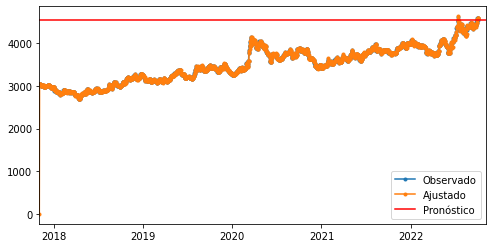

In [22]:
fit_arima = ARIMA_Oct.predict() 
plt.figure(figsize=(8, 4))
plt.plot(TRM_Oct, marker=".", label="Observado")
plt.plot(fit_arima, marker=".", label="Ajustado")
plt.axhline(predict_arima_oct.iloc[1,0], color='r', label="Pronóstico")
plt.xlim(dt.datetime(2017, 11, 4), dt.datetime(2022, 11, 4))
plt.legend(loc="lower right")
plt.show()

#### Modelo lineal

In [27]:
precios_oct=TRM_Oct['TRM (COP/USD)']
t1 = len(precios_oct)
logprice_oct = np.log(precios_oct[1:t1]) 
lag_logprice_oct = np.log(precios_oct[0:t1-1])

* Variables

In [28]:
t1 = len(precios_oct)-1 
seq1 = pd.DataFrame(np.linspace(1,t1,t1)) 

* Operaciones Matriciales

In [29]:
unos1 = pd.DataFrame(np.repeat(1,t1))
x_var1 = pd.DataFrame(lag_logprice_oct.values)
y_var1 = pd.DataFrame(logprice_oct.values)

variables1 = np.concatenate((unos1,seq1,x_var1),1)
X1 = variables1.T @ variables1
Xy1 = variables1.T @ y_var1

Sol1= np.linalg.solve(X1,Xy1)
round(pd.DataFrame(Sol1),4).T

,0,1,2
0,0.0792,0.0,0.99


In [30]:
X0 = np.log(precios_oct[-1])
T1 = t1 + 22
intercept2_o  = Sol1[0]
tendencia1 = Sol1[1]
slope2_o = Sol1[2]
price_predict2_o =  intercept2_o + tendencia1 * T1 + slope2_o * X0
np.exp(price_predict2_o)

array([4544.66274417])

#### Conclusión

Para el 4 de noviembre de 2022 el valor de la TRM fue de 5058.02 pesos, de modo que, el modelo que más se acerca al valor real es el modelo lineal con un precio de 4544.66 pesos en comparación al SARIMA cuyo precio es de 4536.42 pesos.

Ahora bien, claramente la predicción no resulta tan certera al encontrarse por debajo del valor de la TRM en 513.36 pesos. Cabe destacar que, tanto para el modelo ARIMA, como para el modelo lineal, solamente se está teniendo en cuenta los valores pasados de la TRM. No obstante, la TRM se ve afectada por diversos factores tales como: el precio del petróleo, los flujos de capital, la intervención del Banco de la República, entre otros.


###Pronóstico de la Tasa Representativa del Mercado para el 4 de Diciembre de 2022

#### Se importa la base de datos históricos de la Tasa Representativa del Mercado hasta el 11 de Noviembre del 2022.

In [31]:
Base=pd.read_excel("TRM histórico 11.xlsx",parse_dates=True, 
                 index_col="Fecha (dd/mm/aaaa)")
Base

,TRM (COP/USD)
Fecha (dd/mm/aaaa),
2017-11-04,3055.57
2017-11-05,3055.57
2017-11-06,3055.57
2017-11-07,3055.57
2017-11-08,3026.94
...,...
2022-10-31,4819.42
2022-11-01,4898.74
2022-11-02,4975.58


#### Descripción de los datos

In [34]:
Base.describe()

,TRM (COP/USD)
count,1827.000000
mean,3527.996689
std,450.700246
min,2705.340000
25%,3162.400000
50%,3534.990000
75%,3834.130000
max,5058.020000


Se tienen en total 1.827 datos históricos tomados desde el 2017 hasta el 11 de Noviembre del año 2022. El precio promedio de la TRM en los últimos 5 años ha sido de 3.528 pesos, aproximadamente. Por otro lado, se observa que el precio de la TRM tiene una desviación estandar de 450,7 pesos, es decir, este valor indica qe tan dispersos están los precios alrededor de su media. Por último, con respecto al precio mínimo que ha tenido la TRM en los últimos años y el mayor precio alcanzado, se determina que ha tenido una variación de 86,96%% aproximadamente en los años y lo que va corriedo del 2022. Se puede ver que la TRM está en aumento constante y ha tenido un alza significativa en los últimos meses, debido a los fuertes conflictos a nivel internacional y l incertidumbre que genera la llegada de un nuevo gobierno al país.

##### Kurtosis y Asimestría

In [33]:
datos1= Base['TRM (COP/USD)']
from scipy.stats import kurtosis, skew
kurtosis(datos1), skew(datos1)

(-0.22167831598181476, 0.33473643782101564)

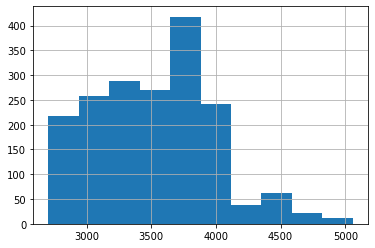

In [35]:
datos1.hist();

* Curtosis: Para la distribución normal estándar se menciona que la curtosis es exactamente igual a 0. No obstante, se puede observar que, la distribución de frecuencia de la TRM, no pertenence a una distribución normal ya que su curtosis no es 0. Las distribución de frecuencia se encuentra clasificada dentro de platicúrtica, es decir, los precios de la TRM están menos concentradas alrededor de la media y conforman una distribución mucho más aplanada que la normal.

* Asimetría: Al presentar una asimestría positiva de 0.334 se puede determinar que los datos tienen una distribución sesgada hacia el lado postivo de la gráfica. Es decir, se presenta una forma más escorada hacia la izquierda.

#### Se realiza el calculo de los retornos logarítmicos de la serie histórica de los datos.

In [36]:
retornos=np.log(Base/Base.shift()).dropna() 
retornos

,TRM (COP/USD)
Fecha (dd/mm/aaaa),
2017-11-05,0.000000
2017-11-06,0.000000
2017-11-07,0.000000
2017-11-08,-0.009414
2017-11-09,-0.003031
...,...
2022-10-31,0.000000
2022-11-01,0.016324
2022-11-02,0.015564


* Gráfica de los retornos logarítmicos

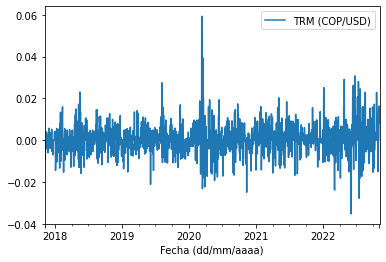

In [ ]:
retornos.plot();

* Gráfica de los precios históricos

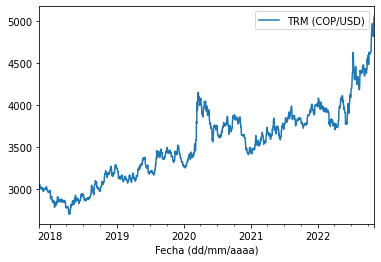

In [ ]:
Base.plot();

#### Modelo lineal

In [37]:
precios=Base['TRM (COP/USD)']
t = len(precios)
logprice = np.log(precios[1:t]) #aquí el inicio 
lag_logprice = np.log(precios[0:t-1])

* Variables

In [38]:
t = len(precios)-1 
seq = pd.DataFrame(np.linspace(1,t,t)) 

* Operaciones Matriciales

In [39]:
unos = pd.DataFrame(np.repeat(1,t))
x_var = pd.DataFrame(lag_logprice.values) #rezago. 
y_var = pd.DataFrame(logprice.values)

variables = np.concatenate((unos,seq,x_var),1)
X = variables.T @ variables
Xy = variables.T @ y_var

Sol= np.linalg.solve(X,Xy)
round(pd.DataFrame(Sol),4).T

,0,1,2
0,0.0538,0.0,0.9932


In [40]:
X0=np.log(precios[-1])
T = t + 22 
intercept2  = Sol[0]
tendencia = Sol[1]
slope2 = Sol[2]
price_predict2 =  intercept2 + tendencia * T + slope2 * X0
np.exp(price_predict2)

array([5055.90617939])

Para diciembre 4 del 2022, se estima que el precio de la TRM sea aproximadamente de 5.056 pesos.

#### Probabilidad

##### Ajuste de probabilidad

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.62it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,75650.432262,-55.978147,6815.035315,inf,0.180410,1.788303e-52
rayleigh,128495.402946,inf,7782.395289,inf,0.436759,2.088155e-317
lognorm,128988.427944,907.560450,7796.897959,inf,0.174646,3.516835e-49
norm,129324.416309,1225.098580,7794.138247,inf,0.187054,2.083693e-56
chi2,130509.701066,1019.291386,7818.307567,inf,0.192517,9.434948e-60


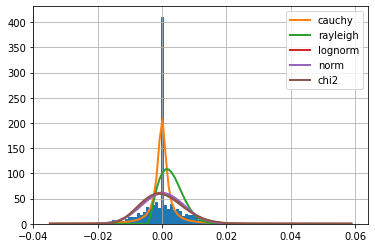

In [41]:
fit = Fitter(retornos,distributions= get_common_distributions())
fit.fit()
fit.summary()

* Parámetros de la distribución

In [42]:
fit.get_best(method = 'ks_statistic')

{'lognorm': {'s': 0.06313412809038915,
  'loc': -0.10268901757946919,
  'scale': 0.10275938893692241}}

##### Simulación

In [43]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S 
    return St

In [44]:
Precios=Base['TRM (COP/USD)']
S0 = Precios.iloc[-1] 
mu1 =0.06313412809038915  
sigma1 =0.10275938893692241  
T = 1/12 
M = 22
NS = 10000 
St = PathsGBM(S0,mu1,sigma1,T,NS,M) 
St[:,-1].mean()

5086.06287406921

***Análisis***

En principio, se realizó un ajuste de probabilidad para los retornos y como resultado se obtuvo que los datos siguen una disrtibución de probabilidad lognormal. Seguido a ello, una vez establecidos los parámetros de dicha distribución se ejecutó una simulación del precio de la TRM para diciembre 04 de 2022 en donde el precio obtenido para esta fecha es de 5082.29 pesos.

***Recomendación***

En efecto, mediante la simulación del método de Monte Carlo se pudo observar que para el 04 de diciembre del 2022 el valor de la TRM resultó mayor que el del 04 de noviembre de 2022 (estimado por el modelo lineal), es decir, 5082.29 pesos > 4544.66 pesos. De otro lado, el modelo lineal arrojó como resultado que para el 04 de diciembre de 2022 el valor de la TRM sería de 5055.91 pesos, por lo tanto, se puede comprobar que se espera un mayor valor de la TRM a 4544.66 pesos.

De este modo, se recomienda al importador acogerse a un forward a un plazo de un mes a una tasa de cambio de 4544.66 pesos, dado que en diciembre se espera que aumente la TRM. Con ello el importador podrá protegerse de la volatilidad que ha presentado el tipo de cambio en el caso colombiano y de esta forma proteger la operación de su negocio.